# NLP Exam: Rap song era classification based on lyrics

## Data preparation and pre processing

Begin by loading the data into a dataframe

In [1]:
import pandas as pd

master_df = pd.read_csv("big_master_song_list.csv")
master_df.head()

,artist,title,year,lyrics
0,Big Daddy Kane,Ain’t No Half-Steppin’,"June 28, 1988",73 ContributorsAin’t No Half-Steppin’ Lyrics“A...
1,Big Daddy Kane,Smooth Operator,"September 19, 1989",43 ContributorsSmooth Operator LyricsThe lead ...
2,Big Daddy Kane,Show & Prove,"August 13, 1994",50 ContributorsShow & Prove LyricsThe posse cu...
3,Big Daddy Kane,Pimpin’ Ain’t Easy,"September 19, 1989",18 ContributorsPimpin’ Ain’t Easy LyricsEven t...
4,Big Daddy Kane,Set It Off,"June 28, 1988",37 ContributorsSet It Off Lyrics“Set It Off” w...


In [2]:
pd.set_option("display.max_rows", 100)

The master dataframe is what will be used to train the model. Start by elementary EDA

In [3]:
# Check missing values and present datatypes
master_df.info() # Year is missing values, unlike the other columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  3946 non-null   object
 1   title   3946 non-null   object
 2   year    3854 non-null   object
 3   lyrics  3946 non-null   object
dtypes: object(4)
memory usage: 123.4+ KB


In [4]:
# Investigating years further due to missing values

master_df["year"] # For our research question, we are only interested in the year, not the exact date. This will be fixed later

0            June 28, 1988
1       September 19, 1989
2          August 13, 1994
3       September 19, 1989
4            June 28, 1988
               ...        
3941                  1997
3942       August 12, 1997
3943         March 9, 1993
3944       August 17, 1999
3945       August 10, 2004
Name: year, Length: 3946, dtype: object

In [5]:
# Looking at which specific songs are missing years
master_df[master_df["year"].isna()]

,artist,title,year,lyrics
71,Biz Markie,Toilet Stool Rap,NaN,1 ContributorToilet Stool Rap LyricsG-goobely-...
73,Biz Markie,Just a friend - single version,NaN,1 ContributorJust a friend - single version Ly...
90,Biz Markie,Do Your Thing,NaN,1 ContributorDo Your Thing Lyrics\nAnd you don...
142,Eazy-E,Real Muthaphuckkin’ G’s (Edited),NaN,11 ContributorsReal Muthaphuckkin’ G’s (Edited...
146,Eazy-E,8-Ball,NaN,5 Contributors8-Ball LyricsI dont drink *** mo...
189,LL Cool J,"4, 3, 2, 1 (Original Version)",NaN,"13 Contributors4, 3, 2, 1 (Original Version) L..."
292,Run DMC,Its Like That (Original),NaN,1 ContributorIts Like That (Original) LyricsAn...
317,Salt-N-Pepa,None Of Your Buisness,NaN,1 ContributorNone Of Your Buisness LyricsWhat'...
329,Salt-N-Pepa,What a Man,NaN,2 ContributorsWhat a Man LyricsFrom Salt n Pep...
334,Salt-N-Pepa,Emphatically No,NaN,5 ContributorsEmphatically No Lyrics“Emphatica...


In [6]:
# Checking how many years we are missing in total

master_df["year"].isna().sum()

92

Two intial problems are appearent in the data which we have scraped.

Firslty, the lyrics columnn contains a lot of metadata about contributions and such.

Secondly, we are missing 92 entries in the year column. We also do not need the day and month. 

We will fix both in the following steps

In [7]:
# Fixing the first problem regarding metadata
import re

master_df["lyrics"] = master_df["lyrics"].apply(
    lambda lyrics: lyrics.split('\n', 1)[1].strip() if '\n' in lyrics else lyrics.strip()
)

In [8]:
# Verify effect

master_df # Worked well - some minor problems but its a good general solution

,artist,title,year,lyrics
0,Big Daddy Kane,Ain’t No Half-Steppin’,"June 28, 1988","Mm, mm, mm\nAw yeah, I'm with this\nI'm just g..."
1,Big Daddy Kane,Smooth Operator,"September 19, 1989","Well excuse me, take a few minutes, to mellow ..."
2,Big Daddy Kane,Show & Prove,"August 13, 1994","Bust a move, we show and prove\nBust a move, w..."
3,Big Daddy Kane,Pimpin’ Ain’t Easy,"September 19, 1989","Anything goes when it comes to hoes, they go\n..."
4,Big Daddy Kane,Set It Off,"June 28, 1988","It’s that song that… Read More \nLet it roll, ..."
...,...,...,...,...
3941,Mobb Deep,Take It in Blood,1997,I'm yawning while I wake up to the early morni...
3942,Mobb Deep,Hoodlum,"August 12, 1997","Sometimes, it feel like the whole world's agai..."
3943,Mobb Deep,Hit It From The Back,"March 9, 1993",From the back— From the back— (Uh)\nFrom the b...
3944,Mobb Deep,What’s Ya Poison,"August 17, 1999",Quite possibly most memorable for Cormega’s ve...


In [9]:
# Handling exstensive date details
master_df["year"] = master_df["year"].str[-4:] # Pandas is NaN-aware so this won't affect those

In [10]:
# How many years are represented in the dataset
master_df["year"].unique() 

array(['1988', '1989', '1994', '1993', '1990', '1991', '2003', '1998',
       '1987', '2004', '1986', '2012', '1995', nan, '2001', '1996',
       '1992', '2002', '2024', '1997', '1985', '1999', '2005', '2006',
       '2008', '1984', '2000', '2023', '2011', '2007', '2020', '1983',
       '2013', '2010', '2014', '2015', '2017', '2009', '2018', '2016',
       '2021', '2019', '2022', '2025', '1982', '1979', '1981', '1980'],
      dtype=object)

To fill in the years. We search for each song online and verify its year. This is a rather repetitive manual task but it ensures quality

In [11]:
# We note that the years have been stored as strings (obviously due to how we could index). This means that filling out values will also have to be as strings.

year_updates = {71: '1991',
                73: '1989',
                90: '2003',
                142: '1993',
                146: '1987',
                189: '1997',
                292: '1984',
                317: '1993',
                329: '1993',
                334: '1993',
                338: '1996',
                344: '1993',
                380: '1999',
                394: '2002',
                480: '2011',
                489: '2011',
                499: '2011',
                525: '2011',
                526: '2003',
                657: '2011',
                684: '2007',
                965: '1997',
                983: '1993',
                997: '2013',
                1074: '1998',
                1093: '1997',
                1105: '1998',
                1109: '2002',
                1112: '1999',
                1117: '2005',
                1125: '2008',
                1126: '2016',
                1129: '2004',
                1132: '2008',
                1136: '2008',
                1137: '2004',
                1138: '2005',
                1140: '2004',
                1145: '2008',
                1147: '2010',
                1148: '2006',
                1149: '2006',
                1573: '2022',
                1587: '2019',#Unofficial release date,
                1749: '2013',
                1987: '2012',
                2016: '2018',
                2042: '2022',
                2238: '2024',
                2449: '1999',
                2538: '2022', #Leaked unreleased song
                2547: '2022', #Also an unreleased song
                2610: '1983',
                2621: '1987',
                2622: '1983',  
                2623: '1982',
                2625: '1988',
                2627: '1982',
                2628: '1981',
                2652: '2005',
                2655: '1998',
                2671: '2003',
                2683: '1995',
                2686: '2010',
                2687: '1995',
                2690: '1988',
                2691: '1988',
                2693: '1988',
                2694: '1995',
                2695: '1995',
                2822: '2013',
                2832: '2016',
                2891: '2022',
                2911: '1997',
                2915: '1995',
                2931: '1997',
                2936: '1997',
                2943: '1997',
                2945: '1997',
                3376: '1999',
                3387: '1988',
                3393: '1988',
                3576: '2007',
                3584: '2013',
                3588: '2022',
                3828: '2002',
                3829: '1998',
                3831: '1998',
                3841: '2002',
                3845:'2013', 
                3861: '1995',
                3890: '2008'}
 
for index, year in year_updates.items():
    master_df.at[index, 'year'] = year

In [12]:
# Verify effect

master_df[master_df["year"].isnull()] # No more null

,artist,title,year,lyrics


In [13]:
# Extra verification by looking up specific artist that we added - lets go with some Rakim

master_df.loc[(master_df["artist"] == "Rakim Allah") & (master_df["title"] == "Madiba")]

,artist,title,year,lyrics
997,Rakim Allah,Madiba,2013,We commit ourselves to the construction of a c...


We must also be wary to check for duplicates. Not only because duplicates contain little new information (thereby just slowing down processing time) but it could also cause unfortunate data leakage. If the group would split the data, with the original song in the training set and the clean version in the test set, this could cause leakage and bias.

The group makes use of the rapidfuzz package to check this

In [14]:
from rapidfuzz import fuzz
from itertools import combinations
import pandas as pd

def find_near_duplicate_lyrics_with_titles(df, threshold=90):
    results = []

    df["artist_clean"] = df["artist"].str.lower().str.strip()

    for artist, group in df.groupby("artist_clean"):
        for idx1, idx2 in combinations(group.index, 2):
            lyrics1 = df.at[idx1, "lyrics"]
            lyrics2 = df.at[idx2, "lyrics"]

            if pd.isna(lyrics1) or pd.isna(lyrics2):
                continue

            score = fuzz.token_set_ratio(lyrics1, lyrics2)
            if score >= threshold:
                results.append({
                    "artist": df.at[idx1, "artist"],
                    "title_1": df.at[idx1, "title"],
                    "title_2": df.at[idx2, "title"],
                    "index_1": idx1,
                    "index_2": idx2,
                    "similarity": score
                })

    return pd.DataFrame(results)

In [15]:
dupes_90_df = find_near_duplicate_lyrics_with_titles(master_df, threshold=90)
dupes_80_df = find_near_duplicate_lyrics_with_titles(master_df, threshold=80)

In [16]:
print("At 80% similarity:", len(dupes_80_df), "matches")
print("At 90% similarity:", len(dupes_90_df), "matches")


At 80% similarity: 130 matches
At 90% similarity: 85 matches


In [17]:
dupes_80_df

,artist,title_1,title_2,index_1,index_2,similarity
0,21 Savage,"out for the night, pt. 2",out for the night,1578,1588,96.113744
1,2Pac,The Rose That Grew From Concrete,The Rose That Grew From Concrete (Autobiograph...,413,429,88.018433
2,50 Cent,In da Club,In da Club (Radio Edit),1001,1041,88.881045
3,Big L,Sandman 118 Freestyle,Who Shot Ya Freestyle,468,492,96.669964
4,Big L,Size ’Em Up,On the Mic,472,494,89.957395
...,...,...,...,...,...,...
125,Snoop Dogg,Tha Shiznit,W Balls,860,888,91.113892
126,Snoop Dogg,Doggy Dogg World,Chronic Break,861,889,89.964158
127,Snoop Dogg,Gz And Hustlas,Class Room Intro,865,899,81.250000
128,Snoop Dogg,Sensual Seduction,Sexual Eruption,886,892,86.684350


In [18]:
dupes_90_df

,artist,title_1,title_2,index_1,index_2,similarity
0,21 Savage,"out for the night, pt. 2",out for the night,1578,1588,96.113744
1,Big L,Sandman 118 Freestyle,Who Shot Ya Freestyle,468,492,96.669964
2,Big L,The Heist,The Heist Revisited,477,498,93.957372
3,Big L,Stretch and Bobbito ’93 Freestyle,Hard to Kill,483,497,91.903858
4,Big Pun,The Dream Shatterer,The Dream Shatterer (Original),1057,1095,92.791971
5,Big Pun,How We Roll,How We Roll ’98,1072,1087,91.203814
6,Biz Markie,Just A Friend,Just a friend - single version,50,73,96.452541
7,Biz Markie,T.S.R. (Toilet Stool Rap),Toilet Stool Rap,67,71,100.000000
8,Busta Rhymes,I Know What You Want,Give It to Me,502,526,96.883853
9,Coolio,Gangsta’s Paradise,Gangsta’s Paradise (Re-Recorded),2896,2902,96.208930


In [19]:
# Drop the duplicates with 90% similarity to ensure no bias

master_df = master_df.drop(index=dupes_90_df["index_2"].unique())


In [20]:
# We see that all dates are stored as strings. This will distort visualizations as the inherit order of strings wont be chronological
master_df["year"].unique()

array(['1988', '1989', '1994', '1993', '1990', '1991', '2003', '1998',
       '1987', '2004', '1986', '2012', '1995', '2001', '1996', '1992',
       '2002', '2024', '1997', '1985', '1999', '2005', '2006', '2008',
       '1984', '2000', '2023', '2011', '2007', '2020', '1983', '2013',
       '2010', '2014', '2015', '2017', '2009', '2018', '2016', '2021',
       '2019', '2022', '2025', '1982', '1979', '1981', '1980'],
      dtype=object)

In [21]:
#Converting to datetime won't work since that will automatically put the dates into JAN 1st. 
# We only want the years so instead we make sure to convert to integers.

master_df["year"] = master_df["year"].astype(int)

In [22]:
# Better
master_df["year"].unique()

array([1988, 1989, 1994, 1993, 1990, 1991, 2003, 1998, 1987, 2004, 1986,
       2012, 1995, 2001, 1996, 1992, 2002, 2024, 1997, 1985, 1999, 2005,
       2006, 2008, 1984, 2000, 2023, 2011, 2007, 2020, 1983, 2013, 2010,
       2014, 2015, 2017, 2009, 2018, 2016, 2021, 2019, 2022, 2025, 1982,
       1979, 1981, 1980])

In [23]:
# Let us also check for tokens resembling something like *Chorus*

def remove_starred_phrases(text):
    return re.sub(r"\*(.*?)\*", "", text)

master_df["lyrics"] = master_df["lyrics"].apply(remove_starred_phrases)

In [24]:
# Check so that it worked

for i in master_df["lyrics"]:
    matches = re.findall(r"\*(.*?)\*", i)
    print(matches) #worked like a charm


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

The data is now in a cleaner and desired format. 

For the purpose of our analysis, we will now create bins for each era of rap

In [25]:
bins = [1979, 1989, 1999, 2009, 2019, 2025]
bin_names = ["80s", "90s", "00s", "10s", "20s"]

master_df["era"] = pd.cut(master_df["year"], bins=bins, labels=bin_names)

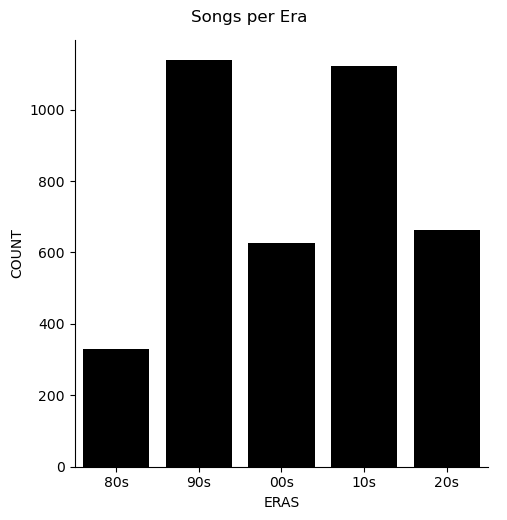

In [26]:
# Look at the distribution of dates

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(data = master_df, 
                x = "era", 
                kind = "count", 
                color = "black")

g.fig.suptitle("Songs per Era", y = 1.03)
g.set(xlabel="ERAS", ylabel="COUNT")
plt.show()


## EDA

The next steps of the process will be EDA which will include tokenization. However, to avoid a situation in which we get data leakage, we will take a copy of our current dataframe

In [27]:
copy_df = master_df

## Sentiment analysis

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/axelolausson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str):
        return None
    scores = sia.polarity_scores(text)
    
    return scores['compound']

copy_df['sentiment'] = copy_df['lyrics'].apply(get_sentiment)

In [30]:
# Get average sentiment per era
era_sentiment = copy_df.groupby('era')['sentiment'].mean()

era_std = copy_df.groupby('era')['sentiment'].std()

/var/folders/00/0bf_tfq95n9cbn8m57n8n7kh0000gn/T/ipykernel_38624/3048765220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_sentiment = copy_df.groupby('era')['sentiment'].mean()
/var/folders/00/0bf_tfq95n9cbn8m57n8n7kh0000gn/T/ipykernel_38624/3048765220.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_std = copy_df.groupby('era')['sentiment'].std()


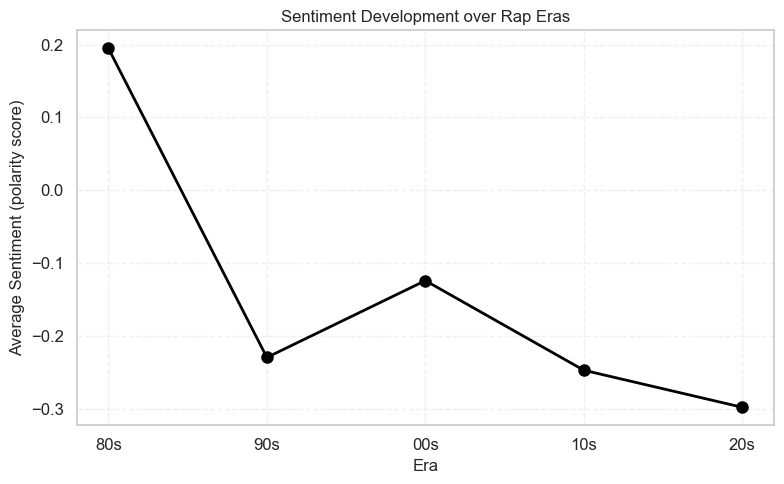

In [31]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
plt.plot(era_sentiment.index, era_sentiment.values, marker='o', markersize=8, linewidth=2, color = "black")


plt.title("Sentiment Development over Rap Eras", fontsize=12)
plt.xlabel("Era", fontsize=12)
plt.ylabel("Average Sentiment (polarity score)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

## Topic Modeling

For topic modeling, we group by eras with the intention of getting a clear insight into what defined lyrics from each era. 

Stopword removal and lemmatization was carried out as common practice within Topic Modeling.

Cleaning (stopword removal)

In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/axelolausson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/axelolausson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
extra_stopwords = {'yeah', 'mm', 'uh', 'huh', 'yo', 'ay', 'ooh', 'na', 'oh', 'ha', 'la', 'uhh', 'ayy',
    'like', 'dem', 'wit', 'yuh', 'im', 'u', 'aint', 'niggas', 'gotta', 'wanna', 'gon',
    'get', 'got', 'one', 'come', 'know', 'make', 'time', 'back', 'man', 'let', 'see',
    'as', 'keep', 'bag', 'drop', 'higher', 'cause', 'could', 'hey', 'said', 'say'}

#union allows us to add extra stopwords to our wordlist while ensuring that these are not duplicated. 
stop_words = set(stopwords.words('english')).union(extra_stopwords)



def tokenizeclean(text):
    tokens = word_tokenize(text.lower())
    return [
        w
        for w in tokens
        if (
            w not in stop_words and
            w.isalpha() and # is alpha ensures that we tokenize only letters and nothing else. 
            len(w) > 2
        )
    ]

In [104]:
# Apply cleaning (removes stopwords, punctuation, short words)
copy_df['lyrics_tokenized_cleaned'] = copy_df['lyrics'].apply(tokenizeclean)

In [99]:
copy_df

,artist,title,year,lyrics,artist_clean,era,sentiment,lyrics_tokenized_cleaned,lyrics_lemmatized,lyrics_cleaned_tokenized,clean_detokenized,label
0,Big Daddy Kane,Ain’t No Half-Steppin’,1988,"Mm, mm, mm\nAw yeah, I'm with this\nI'm just g...",big daddy kane,80s,0.9915,"[sit, laid, nice, mellow, beat, smooth, lyrics...","[sit, laid, nice, mellow, beat, smooth, lyric,...","[sit, laid, nice, mellow, beat, smooth, lyrics...",sit laid nice mellow beat smooth lyrics set st...,3
1,Big Daddy Kane,Smooth Operator,1989,"Well excuse me, take a few minutes, to mellow ...",big daddy kane,80s,0.9871,"[well, excuse, take, minutes, mellow, big, dad...","[well, excuse, take, minute, mellow, big, dadd...","[well, excuse, take, minutes, mellow, big, dad...",well excuse take minutes mellow big daddy kane...,3
2,Big Daddy Kane,Show & Prove,1994,"Bust a move, we show and prove\nBust a move, w...",big daddy kane,90s,-0.9234,"[bust, move, show, prove, bust, move, show, pr...","[bust, move, show, prove, bust, move, show, pr...","[bust, move, show, prove, bust, move, show, pr...",bust move show prove bust move show prove bust...,4
3,Big Daddy Kane,Pimpin’ Ain’t Easy,1989,"Anything goes when it comes to hoes, they go\n...",big daddy kane,80s,-0.8856,"[anything, goes, comes, hoes, pimpin, easy, pi...","[anything, go, come, hoe, pimpin, easy, pimpin...","[anything, goes, comes, hoes, pimpin, easy, pi...",anything goes comes hoes pimpin easy pimpin ea...,3
4,Big Daddy Kane,Set It Off,1988,"It’s that song that… Read More \nLet it roll, ...",big daddy kane,80s,0.9760,"[song, read, roll, bold, hold, fold, soul, con...","[song, read, roll, bold, hold, fold, soul, con...","[song, read, roll, bold, hold, fold, soul, con...",song read roll bold hold fold soul control eff...,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,Mobb Deep,Take It in Blood,1997,I'm yawning while I wake up to the early morni...,mobb deep,90s,-0.9993,"[yawning, wake, early, morning, gunfire, anoth...","[yawning, wake, early, morning, gunfire, anoth...","[yawning, wake, early, morning, gunfire, anoth...",yawning wake early morning gunfire another day...,4
3942,Mobb Deep,Hoodlum,1997,"Sometimes, it feel like the whole world's agai...",mobb deep,90s,-0.9982,"[sometimes, feel, whole, world, henny, bent, z...","[sometimes, feel, whole, world, henny, bent, z...","[sometimes, feel, whole, world, henny, bent, z...",sometimes feel whole world henny bent zone gaz...,4
3943,Mobb Deep,Hit It From The Back,1993,From the back— From the back— (Uh)\nFrom the b...,mobb deep,90s,-0.7037,"[word, hit, check, shorty, front, better, act,...","[word, hit, check, shorty, front, better, act,...","[word, hit, check, shorty, front, better, act,...",word hit check shorty front better act frontin...,4
3944,Mobb Deep,What’s Ya Poison,1999,Quite possibly most memorable for Cormega’s ve...,mobb deep,90s,-0.9972,"[quite, possibly, memorable, cormega, verse, g...","[quite, possibly, memorable, cormega, verse, g...","[quite, possibly, memorable, cormega, verse, g...",quite possibly memorable cormega verse garnere...,4


Lemmatizer

In [100]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(w) for w in tokens]

# Create a lemmatized column
copy_df['lyrics_lemmatized'] = copy_df['lyrics_tokenized_cleaned'].apply(lemmatize_tokens)

After attempting LDA topic modeling on lemmatized tokens, we reverted to just the lyrics_cleaned column as they showed more detailed results of topics

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

for era, group in copy_df.groupby('era'):
    era_texts = group['lyrics_tokenized_cleaned']
    
    dictionary = corpora.Dictionary(era_texts)
    
    dictionary.filter_extremes(no_below=3, no_above=0.5)
    
    corpus = [dictionary.doc2bow(text) for text in era_texts]
    
    lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state=42)
    # Assign topic to each doc
    topic_indices = [max(lda[doc], key=lambda tup: tup[1])[0] for doc in corpus]
    # Find most common topic for this era
    
    from collections import Counter
    
    most_common_topic = Counter(topic_indices).most_common(1)[0][0]
    
    keywords = [word for word, _ in lda.show_topic(most_common_topic, topn=8)]
    
    print(f"Era: {era}")
    
    print(f"  Most popular topic keywords: {', '.join(keywords)}")
    
    print()

In [48]:
copy_df

,artist,title,year,lyrics,artist_clean,era,sentiment,lyrics_tokenized_cleaned,lyrics_lemmatized
0,Big Daddy Kane,Ain’t No Half-Steppin’,1988,"Mm, mm, mm\nAw yeah, I'm with this\nI'm just g...",big daddy kane,80s,0.9915,"[sit, laid, nice, mellow, beat, smooth, lyrics...","[sit, laid, nice, mellow, beat, smooth, lyric,..."
1,Big Daddy Kane,Smooth Operator,1989,"Well excuse me, take a few minutes, to mellow ...",big daddy kane,80s,0.9871,"[well, excuse, take, minutes, mellow, big, dad...","[well, excuse, take, minute, mellow, big, dadd..."
2,Big Daddy Kane,Show & Prove,1994,"Bust a move, we show and prove\nBust a move, w...",big daddy kane,90s,-0.9234,"[bust, move, show, prove, bust, move, show, pr...","[bust, move, show, prove, bust, move, show, pr..."
3,Big Daddy Kane,Pimpin’ Ain’t Easy,1989,"Anything goes when it comes to hoes, they go\n...",big daddy kane,80s,-0.8856,"[anything, goes, comes, hoes, pimpin, easy, pi...","[anything, go, come, hoe, pimpin, easy, pimpin..."
4,Big Daddy Kane,Set It Off,1988,"It’s that song that… Read More \nLet it roll, ...",big daddy kane,80s,0.9760,"[song, read, roll, bold, hold, fold, soul, con...","[song, read, roll, bold, hold, fold, soul, con..."
...,...,...,...,...,...,...,...,...,...
3941,Mobb Deep,Take It in Blood,1997,I'm yawning while I wake up to the early morni...,mobb deep,90s,-0.9993,"[yawning, wake, early, morning, gunfire, anoth...","[yawning, wake, early, morning, gunfire, anoth..."
3942,Mobb Deep,Hoodlum,1997,"Sometimes, it feel like the whole world's agai...",mobb deep,90s,-0.9982,"[sometimes, feel, whole, world, henny, bent, z...","[sometimes, feel, whole, world, henny, bent, z..."
3943,Mobb Deep,Hit It From The Back,1993,From the back— From the back— (Uh)\nFrom the b...,mobb deep,90s,-0.7037,"[word, hit, check, shorty, front, better, act,...","[word, hit, check, shorty, front, better, act,..."
3944,Mobb Deep,What’s Ya Poison,1999,Quite possibly most memorable for Cormega’s ve...,mobb deep,90s,-0.9972,"[quite, possibly, memorable, cormega, verse, g...","[quite, possibly, memorable, cormega, verse, g..."


## Wordcloud

In [37]:
from nltk.tokenize.treebank import TreebankWordDetokenizer


def get_decade_tokens(df, era):
    decade_tokens = []
    filtered_df = df[df["era"] == era]
    
    for tokenized_lyrics in filtered_df["lyrics_tokenized_cleaned"]:
        for token in tokenized_lyrics:
            decade_tokens.append(token)

    return decade_tokens # Here, we gather all tokens from a specific era

eighties = get_decade_tokens(copy_df, "80s")
nineties = get_decade_tokens(copy_df, "90s")
zeros = get_decade_tokens(copy_df, "00s")
tens = get_decade_tokens(copy_df, "10s")
twenties = get_decade_tokens(copy_df, "20s")

def get_decade_lyrics(token_list):
    long_text = TreebankWordDetokenizer().detokenize(token_list)
    return long_text #here, we go from the large per-era token list defined before, into making one large era-document. 

eighties_lyrics = get_decade_lyrics(eighties)
nineties_lyrics = get_decade_lyrics(nineties)
zeros_lyrics = get_decade_lyrics(zeros)
tens_lyrics = get_decade_lyrics(tens)
twenties_lyrics = get_decade_lyrics(twenties)


In [38]:
# Making some wordclouds to see common words every year

from wordcloud import WordCloud



def make_wordcloud(lyrics, title):
    plt.figure(figsize=(12,4))
    wordcloud = WordCloud(background_color="white", max_words=100).generate(lyrics)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize = 20)
    plt.show()

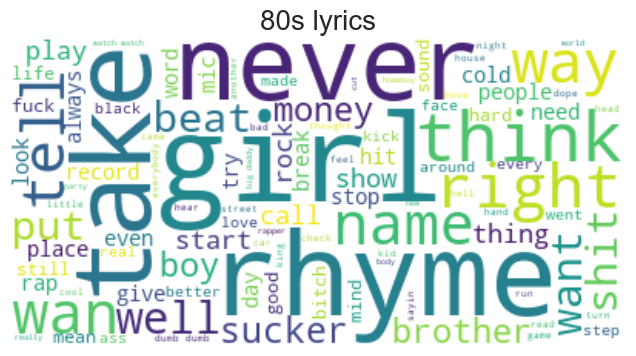

In [45]:
make_wordcloud(eighties_lyrics, "80s lyrics")

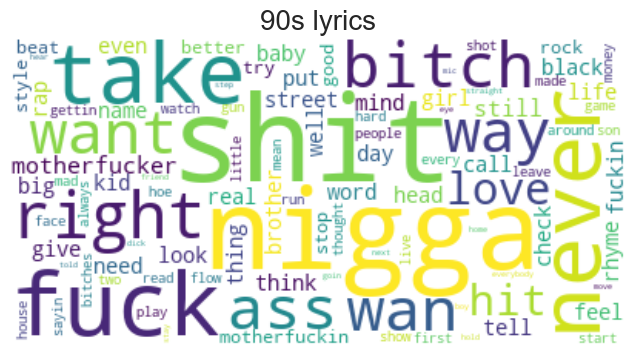

In [46]:
make_wordcloud(nineties_lyrics, "90s lyrics")

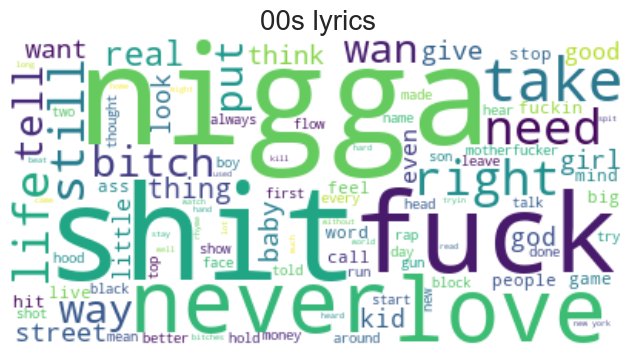

In [47]:
make_wordcloud(zeros_lyrics, "00s lyrics")

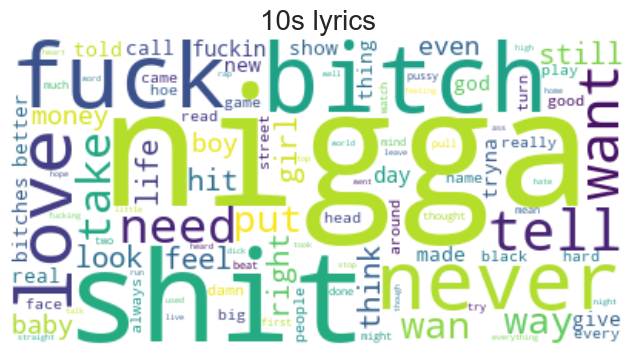

In [48]:
make_wordcloud(tens_lyrics, "10s lyrics")

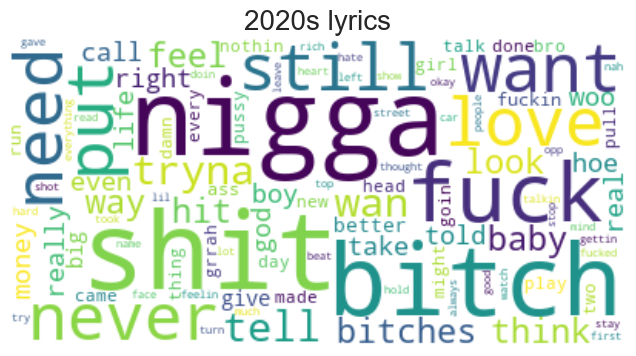

In [49]:
make_wordcloud(twenties_lyrics, "2020s lyrics")

It seems as if profanity has taken a bigger place in rap over time. Further more, its also interesting to see how the n-word was virtually non-existent in the 80s, just to take a big place in the 90s and then continue to do so over time.

In [50]:
copy_df

,artist,title,year,lyrics,artist_clean,era,sentiment,lyrics_tokenized_cleaned,lyrics_lemmatized
0,Big Daddy Kane,Ain’t No Half-Steppin’,1988,"Mm, mm, mm\nAw yeah, I'm with this\nI'm just g...",big daddy kane,80s,0.9915,"[sit, laid, nice, mellow, beat, smooth, lyrics...","[sit, laid, nice, mellow, beat, smooth, lyric,..."
1,Big Daddy Kane,Smooth Operator,1989,"Well excuse me, take a few minutes, to mellow ...",big daddy kane,80s,0.9871,"[well, excuse, take, minutes, mellow, big, dad...","[well, excuse, take, minute, mellow, big, dadd..."
2,Big Daddy Kane,Show & Prove,1994,"Bust a move, we show and prove\nBust a move, w...",big daddy kane,90s,-0.9234,"[bust, move, show, prove, bust, move, show, pr...","[bust, move, show, prove, bust, move, show, pr..."
3,Big Daddy Kane,Pimpin’ Ain’t Easy,1989,"Anything goes when it comes to hoes, they go\n...",big daddy kane,80s,-0.8856,"[anything, goes, comes, hoes, pimpin, easy, pi...","[anything, go, come, hoe, pimpin, easy, pimpin..."
4,Big Daddy Kane,Set It Off,1988,"It’s that song that… Read More \nLet it roll, ...",big daddy kane,80s,0.9760,"[song, read, roll, bold, hold, fold, soul, con...","[song, read, roll, bold, hold, fold, soul, con..."
...,...,...,...,...,...,...,...,...,...
3941,Mobb Deep,Take It in Blood,1997,I'm yawning while I wake up to the early morni...,mobb deep,90s,-0.9993,"[yawning, wake, early, morning, gunfire, anoth...","[yawning, wake, early, morning, gunfire, anoth..."
3942,Mobb Deep,Hoodlum,1997,"Sometimes, it feel like the whole world's agai...",mobb deep,90s,-0.9982,"[sometimes, feel, whole, world, henny, bent, z...","[sometimes, feel, whole, world, henny, bent, z..."
3943,Mobb Deep,Hit It From The Back,1993,From the back— From the back— (Uh)\nFrom the b...,mobb deep,90s,-0.7037,"[word, hit, check, shorty, front, better, act,...","[word, hit, check, shorty, front, better, act,..."
3944,Mobb Deep,What’s Ya Poison,1999,Quite possibly most memorable for Cormega’s ve...,mobb deep,90s,-0.9972,"[quite, possibly, memorable, cormega, verse, g...","[quite, possibly, memorable, cormega, verse, g..."


## TTR

In [51]:
from collections import Counter

#Flatten all tokens from all songs into a single list
all_tokens = [token for tokens in copy_df['lyrics_tokenized_cleaned'] for token in tokens]
total_tokens = len(all_tokens)
token_counts = Counter(all_tokens)

#Calculating frequencies as percentages
token_freq = {word: count / total_tokens *100 for word, count in token_counts.items()}

#Setting a "rare" word threshold of < 0.01% based on Bansal et al (2025)
rare_threshold = 0.01

def rare_word_fraction(tokens, freq_dict, threshold=0.01):
    total = len(tokens)
    if total == 0:
        return 0
    rare = [word for word in tokens if freq_dict.get(word, 0) < threshold]
    return len(rare) / total

# group all tokens by decade into one big list
tokens_by_decade = (
    copy_df
    .groupby('era')['lyrics_tokenized_cleaned']
    .apply(lambda lists: [tok for song in lists for tok in song])
)
#Grouping by era and taking the mean for both measures
ttr_by_decade = tokens_by_decade.apply(lambda toks: len(set(toks)) / len(toks) if toks else 0)
rare_frac_by_decade = tokens_by_decade.apply(lambda toks: rare_word_fraction(toks, token_freq, rare_threshold))

print("Rare word fraction by era:")
print(rare_frac_by_decade)
print("\nTTR by era:")
print(ttr_by_decade)

Rare word fraction by era:
era
80s    0.293851
90s    0.295778
00s    0.303833
10s    0.281668
20s    0.266378
Name: lyrics_tokenized_cleaned, dtype: float64

TTR by era:
era
80s    0.129292
90s    0.072088
00s    0.105237
10s    0.073989
20s    0.091919
Name: lyrics_tokenized_cleaned, dtype: float64


/var/folders/00/0bf_tfq95n9cbn8m57n8n7kh0000gn/T/ipykernel_38624/1889628318.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('era')['lyrics_tokenized_cleaned']


/var/folders/00/0bf_tfq95n9cbn8m57n8n7kh0000gn/T/ipykernel_38624/1979029017.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('era')['lyrics_tokenized_cleaned']


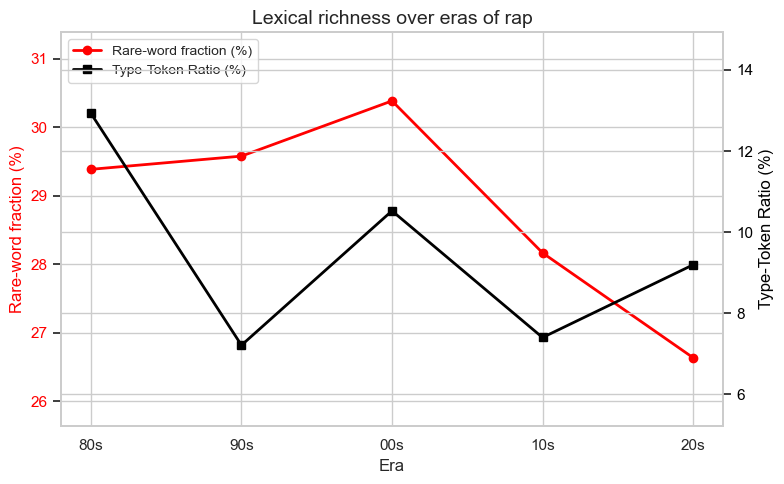

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate all tokens by era (decade)
tokens_by_decade = (
    copy_df
    .groupby('era')['lyrics_tokenized_cleaned']
    .apply(lambda lists: [tok for song in lists for tok in song])
)

# Compute aggregated metrics per decade
ttr_by_decade = tokens_by_decade.apply(
    lambda toks: len(set(toks)) / len(toks) if toks else 0
)
rare_by_decade = tokens_by_decade.apply(
    lambda toks: rare_word_fraction(toks, token_freq, rare_threshold)
)

# Plotting
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(8, 5))

# Left axis: Rare-word fraction 
ax1.plot(
    rare_by_decade.index,
    rare_by_decade.values * 100,
    color='red',
    marker='o',
    linewidth=2,
    label='Rare-word fraction (%)'
)
ax1.set_xlabel('Era', fontsize=12)
ax1.set_ylabel('Rare-word fraction (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(rare_by_decade.min()*100 - 1, rare_by_decade.max()*100 + 1)

# Right axis: Type-Token Ratio
ax2 = ax1.twinx()
ax2.plot(
    ttr_by_decade.index,
    ttr_by_decade.values * 100,
    color='black',
    marker='s',
    linewidth=2,
    label='Type-Token Ratio (%)'
)
ax2.set_ylabel('Type-Token Ratio (%)', color='black', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(ttr_by_decade.min()*100 - 2, ttr_by_decade.max()*100 + 2)

# Title and combined legend
plt.title('Lexical richness over eras of rap', fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Modeling

Tokenization and cleaning will be carried out again using the function created earlier. We also call drop na to be fully sure that we have no missing values, since missing values make us unable to run ML-models

In [53]:
master_df.dropna(inplace=True)

In [54]:
master_df['lyrics_cleaned_tokenized'] = master_df['lyrics'].apply(tokenizeclean)

## Training a baseline model - The Logistic Regression

In [55]:
# For a logistic regression, our data needs to be non-tokenized. We are using a treedetokenizer for this purpose. 

detok = TreebankWordDetokenizer()

# Apply detokenization row-wise to the tokenized list
master_df["clean_detokenized"] = master_df["lyrics_tokenized_cleaned"].apply(detok.detokenize)

In [50]:
master_df["clean_detokenized"]

0       sit laid nice mellow beat smooth lyrics set st...
1       well excuse take minutes mellow big daddy kane...
2       bust move show prove bust move show prove bust...
3       anything goes comes hoes pimpin easy pimpin ea...
4       song read roll bold hold fold soul control eff...
                              ...                        
3941    yawning wake early morning gunfire another day...
3942    sometimes feel whole world henny bent zone gaz...
3943    word hit check shorty front better act frontin...
3944    quite possibly memorable cormega verse garnere...
3945    whether win lose another day another dollar ge...
Name: clean_detokenized, Length: 3879, dtype: object

In [51]:
master_df.isnull().sum()

artist                      0
title                       0
year                        0
lyrics                      0
artist_clean                0
era                         0
sentiment                   0
lyrics_tokenized_cleaned    0
lyrics_lemmatized           0
label                       0
clean_detokenized           0
dtype: int64

Tuning hyperparameters for Logistic Regression...
C: 0.1, max_features: 5000, ngrams: (1, 1) -> F1: 0.529
C: 0.1, max_features: 5000, ngrams: (1, 2) -> F1: 0.531
C: 0.1, max_features: 10000, ngrams: (1, 1) -> F1: 0.533
C: 0.1, max_features: 10000, ngrams: (1, 2) -> F1: 0.537
C: 0.1, max_features: 20000, ngrams: (1, 1) -> F1: 0.529
C: 0.1, max_features: 20000, ngrams: (1, 2) -> F1: 0.533
C: 1.0, max_features: 5000, ngrams: (1, 1) -> F1: 0.609
C: 1.0, max_features: 5000, ngrams: (1, 2) -> F1: 0.602
C: 1.0, max_features: 10000, ngrams: (1, 1) -> F1: 0.616
C: 1.0, max_features: 10000, ngrams: (1, 2) -> F1: 0.603
C: 1.0, max_features: 20000, ngrams: (1, 1) -> F1: 0.617
C: 1.0, max_features: 20000, ngrams: (1, 2) -> F1: 0.609
C: 10.0, max_features: 5000, ngrams: (1, 1) -> F1: 0.614
C: 10.0, max_features: 5000, ngrams: (1, 2) -> F1: 0.595
C: 10.0, max_features: 10000, ngrams: (1, 1) -> F1: 0.621
C: 10.0, max_features: 10000, ngrams: (1, 2) -> F1: 0.613
C: 10.0, max_features: 20000, ngrams: (1

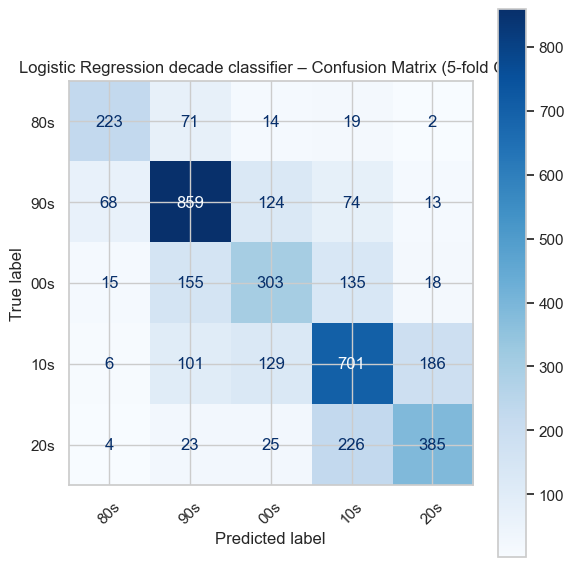

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


X = master_df["clean_detokenized"]
y = master_df["era"]

desired_order = ['80s', '90s', '00s', '10s', '20s']
le = LabelEncoder()
le.classes_ = np.array(desired_order)
y_encoded = le.transform(y)

param_grid = {
    'C': [0.1, 1.0, 10.0],  
    'max_features': [5000, 10000, 20000],  # TF-IDF vocabulary size
    'ngram_range': [(1, 1), (1, 2)]  # Unigrams vs unigrams+bigrams
}

print("Tuning hyperparameters for Logistic Regression...")
best_params = None
best_val_score = 0

# Use first fold for hyperparameter tuning
skf_tune = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, val_idx = next(skf_tune.split(X, y_encoded))
X_train_tune, X_val_tune = X.iloc[train_idx], X.iloc[val_idx]
y_train_tune, y_val_tune = y_encoded[train_idx], y_encoded[val_idx]

# Grid search
for C in param_grid['C']:
    for max_features in param_grid['max_features']:
        for ngram_range in param_grid['ngram_range']:
            # Create TF-IDF vectorizer with current parameters
            vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
            X_train_tfidf = vectorizer.fit_transform(X_train_tune)
            X_val_tfidf = vectorizer.transform(X_val_tune)
            
            # Train logistic regression
            lrm = LogisticRegression(C=C, max_iter=1000, class_weight="balanced", random_state=42)
            lrm.fit(X_train_tfidf, y_train_tune)
            
            # Evaluate on validation set
            y_pred = lrm.predict(X_val_tfidf)
            val_f1 = f1_score(y_val_tune, y_pred, average='macro')
            
            print(f"C: {C}, max_features: {max_features}, ngrams: {ngram_range} -> F1: {val_f1:.3f}")
            
            if val_f1 > best_val_score:
                best_val_score = val_f1
                best_params = {
                    'C': C,
                    'max_features': max_features,
                    'ngram_range': ngram_range
                }

print(f"\nBest parameters: {best_params}")
print(f"Best validation F1: {best_val_score:.3f}\n")

print("Running 5-fold CV with best parameters...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_preds, all_trues = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
    
    # Create TF-IDF vectorizer with best parameters
    vectorizer = TfidfVectorizer(
        max_features=best_params['max_features'],
        ngram_range=best_params['ngram_range']
    )
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Train logistic regression with best C parameter
    lrm = LogisticRegression(
        C=best_params['C'],
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    )
    lrm.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred = lrm.predict(X_test_tfidf)
    
    # Calculate fold F1
    fold_f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Fold {fold+1} F1: {fold_f1:.3f}")
    
    all_preds.extend(y_pred)
    all_trues.extend(y_test)

print("\nMacro F1-score (Logistic Regression, 5-fold average):", f1_score(all_trues, all_preds, average='macro'))
print("\nClassification Report (Logistic Regression):")
print(classification_report(all_trues, all_preds, target_names=le.classes_))

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    all_trues, all_preds,
    display_labels=desired_order,
    cmap="Blues",
    ax=ax,
    xticks_rotation=45
)
plt.title("Logistic Regression decade classifier – Confusion Matrix (5-fold CV)")
plt.tight_layout()
plt.show()

## Model 2: Random Forest

     train share
era             
90s     0.293265
10s     0.289397
20s     0.171125
00s     0.161457
80s     0.084757
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has alr

[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.0s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.0s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.1s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.1s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.2s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.4s
[CV] END rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=  13.5s
[CV] END rf__max_dep

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Best CV macro-F1: 0.620
Best hyper-parameters:
 {'rf__n_estimators': 600, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 3, 'rf__max_features': 'log2', 'rf__max_depth': 60}

Final CV-based evaluation (5-fold):
              precision    recall  f1-score   support

         00s      0.576     0.364     0.446       626
         10s      0.661     0.516     0.580      1123
         20s      0.576     0.811     0.674       663
         80s      0.566     0.839     0.676       329
         90s      0.703     0.731     0.717      1138

    accuracy                          0.633      3879
   macro avg      0.616     0.652     0.618      3879
weighted avg      0.637     0.633     0.623      3879



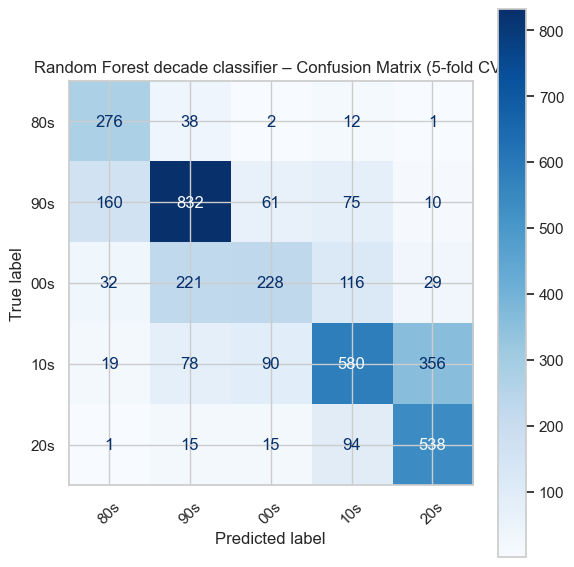

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils import parallel_backend

RANDOM_STATE = 42  
np.random.seed(RANDOM_STATE)


X = master_df["clean_detokenized"]
y = master_df["era"]

# Split for hyperparameter search (but evaluation will be on full CV)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print(y_train.value_counts(normalize=True).rename("train share").to_frame())

def doc_len(text_series: pd.Series) -> np.ndarray:
    return text_series.str.split().str.len().to_numpy().reshape(-1, 1)

tfidf_cfg = {
    "ngram_range": (1, 2),
    "max_features": 20000,
    "min_df": 3,
    "sublinear_tf": True
}

feature_pipe = ColumnTransformer(
    transformers=[
        ("tfidf", TfidfVectorizer(**tfidf_cfg), "clean_detokenized"),
        ("doc_len", FunctionTransformer(doc_len, validate=False), "clean_detokenized")
    ],
    remainder="drop"
)

to_dense = FunctionTransformer(lambda X: X if not hasattr(X, "toarray") else X.toarray(),
                                accept_sparse=True)

rf_clf = RandomForestClassifier(
    n_estimators=400, 
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=RANDOM_STATE
)

pipe = Pipeline([
    ("features", feature_pipe),
    ("to_dense", to_dense),
    ("rf", rf_clf)
])

param_dist = {
    "rf__n_estimators":      [200, 400, 600, 800],
    "rf__max_depth":         [None, 30, 60],
    "rf__max_features":      ["sqrt", "log2", 0.2],
    "rf__min_samples_leaf":  [1, 3, 5],
    "rf__min_samples_split": [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE
)

with parallel_backend("loky"):
    search.fit(X_train.to_frame(), y_train)

print(f"\nBest CV macro-F1: {search.best_score_:.3f}")
print("Best hyper-parameters:\n", search.best_params_)

best_model = search.best_estimator_

y_pred_cv = cross_val_predict(
    best_model, 
    X.to_frame(), 
    y, 
    cv=cv, 
    n_jobs=-1
)

print("\nFinal CV-based evaluation (5-fold):")
print(classification_report(y, y_pred_cv, digits=3))

labels = list(y.cat.categories)

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y, y_pred_cv,
    labels=labels,
    cmap="Blues",
    ax=ax,
    xticks_rotation=45
)
plt.title("Random Forest decade classifier – Confusion Matrix (5-fold CV)")
plt.tight_layout()
plt.show()

## Model 3: Convolutional Neural Network

/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 1: best params = {'dropout_rate': 0.3, 'filters': 128, 'kernel_size': 3} with inner F1 = 0.540


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1 outer F1: 0.561



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 2: best params = {'dropout_rate': 0.3, 'filters': 128, 'kernel_size': 3} with inner F1 = 0.544


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 2 outer F1: 0.593



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 3: best params = {'dropout_rate': 0.3, 'filters': 128, 'kernel_size': 3} with inner F1 = 0.550


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3 outer F1: 0.567



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 4: best params = {'dropout_rate': 0.3, 'filters': 128, 'kernel_size': 3} with inner F1 = 0.534


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4 outer F1: 0.607



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 5: best params = {'dropout_rate': 0.5, 'filters': 128, 'kernel_size': 3} with inner F1 = 0.537


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 5 outer F1: 0.591

Overall Macro F1 (5-fold CV): 0.5841587381148244

Classification Report:
              precision    recall  f1-score   support

         00s       0.48      0.34      0.39       626
         10s       0.59      0.68      0.63      1123
         20s       0.66      0.55      0.60       663
         80s       0.71      0.50      0.59       329
         90s       0.66      0.78      0.71      1138

    accuracy                           0.62      3879
   macro avg       0.62      0.57      0.58      3879
weighted avg       0.61      0.62      0.61      3879



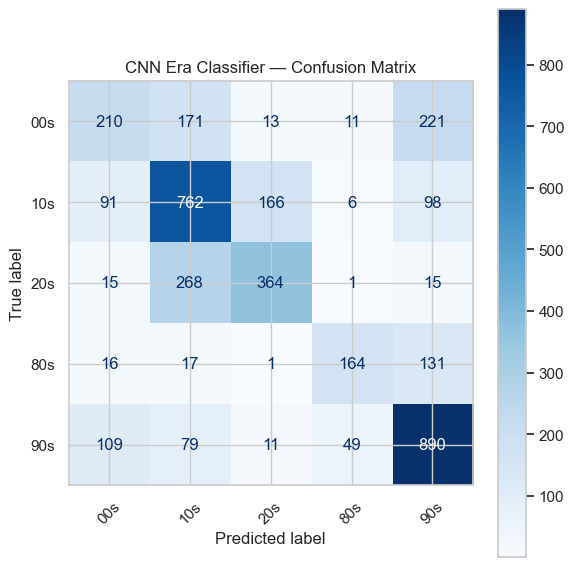

In [106]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X = master_df['clean_detokenized'].values
y = master_df['era'].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = np.unique(y_encoded).shape[0]


param_grid = {
    'filters': [64, 128],
    'kernel_size': [3, 5],
    'dropout_rate': [0.3, 0.5]
}

def build_cnn_model(filters=128, kernel_size=5, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=100, input_length=MAX_LEN),
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(dropout_rate),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )
    return model

OUTER_FOLDS = 5
INNER_FOLDS = 3
MAX_LEN = 200
BATCH_SIZE = 32
EPOCHS = 10

outer_cv = StratifiedKFold(n_splits=OUTER_FOLDS, shuffle=True, random_state=42)
all_preds, all_trues = [], []

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y_encoded), 1):
    X_train_raw, X_test_raw = X[train_idx], X[test_idx]
    y_train_enc, y_test_enc = y_encoded[train_idx], y_encoded[test_idx]
    
    y_train = to_categorical(y_train_enc, num_classes=n_classes)
    y_test  = to_categorical(y_test_enc,  num_classes=n_classes)
    
    # We are a bit overly cautious to not overfit but better safe than sorry
    tokenizer = Tokenizer(num_words=20000, oov_token='<UNK>')
    tokenizer.fit_on_texts(X_train_raw)
    X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
    X_test_seq  = tokenizer.texts_to_sequences(X_test_raw)
    X_train = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
    X_test  = pad_sequences(X_test_seq,  maxlen=MAX_LEN, padding="post", truncating="post")
    

    inner_cv = StratifiedKFold(n_splits=INNER_FOLDS, shuffle=True, random_state=fold_idx)
    best_inner_score = 0.0
    best_params = None
    
    for params in ParameterGrid(param_grid):
        inner_scores = []
        
        for inner_train_idx, inner_val_idx in inner_cv.split(X_train, y_train_enc):
            X_it, X_iv = X_train[inner_train_idx], X_train[inner_val_idx]
            y_it, y_iv = y_train[inner_train_idx], y_train[inner_val_idx]
            
            model = build_cnn_model(**params)
            model.fit(
                X_it, y_it,
                validation_data=(X_iv, y_iv),
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=0
            )
            
            preds = model.predict(X_iv).argmax(axis=1)
            true  = y_iv.argmax(axis=1)
            inner_scores.append(f1_score(true, preds, average='macro'))
        
        mean_score = np.mean(inner_scores)
        if mean_score > best_inner_score:
            best_inner_score = mean_score
            best_params = params
    
    print(f"Fold {fold_idx}: best params = {best_params} with inner F1 = {best_inner_score:.3f}")
    

    final_model = build_cnn_model(**best_params)
    final_model.fit(
        X_train, y_train, 
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE, 
        verbose=0
    )
    
    y_pred = final_model.predict(X_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    
    fold_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Fold {fold_idx} outer F1: {fold_f1:.3f}\n")
    
    all_preds.extend(y_pred)
    all_trues.extend(y_true)


macro_f1 = f1_score(all_trues, all_preds, average='macro')
print("Overall Macro F1 (5-fold CV):", macro_f1)

print("\nClassification Report:")
print(classification_report(all_trues, all_preds, target_names=le.classes_))

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(
    all_trues, all_preds,
    display_labels=le.classes_,
    cmap="Blues",
    ax=ax,
    xticks_rotation=45
)
plt.title("CNN Era Classifier — Confusion Matrix")
plt.tight_layout()
plt.show()

## Model 4: Long Short Term Memory

/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Fold 1: Best inner params = {'dropout_rate': 0.3, 'embedding_dim': 100, 'lstm_units': 64}, inner F1 = 0.355


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 1 outer F1: 0.392



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Fold 2: Best inner params = {'dropout_rate': 0.5, 'embedding_dim': 100, 'lstm_units': 64}, inner F1 = 0.349


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 2 outer F1: 0.366



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Fold 3: Best inner params = {'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 128}, inner F1 = 0.335


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Fold 3 outer F1: 0.351



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Fold 4: Best inner params = {'dropout_rate': 0.5, 'embedding_dim': 100, 'lstm_units': 64}, inner F1 = 0.368


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 4 outer F1: 0.373



/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Fold 5: Best inner params = {'dropout_rate': 0.3, 'embedding_dim': 100, 'lstm_units': 64}, inner F1 = 0.357


/Users/axelolausson/miniforge3/envs/ds-env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 5 outer F1: 0.409

Overall Macro F1 (5-fold CV): 0.3866442029298658

Classification Report:
              precision    recall  f1-score   support

         00s       0.26      0.32      0.29       626
         10s       0.45      0.53      0.48      1123
         20s       0.41      0.36      0.39       663
         80s       0.46      0.16      0.24       329
         90s       0.55      0.53      0.54      1138

    accuracy                           0.43      3879
   macro avg       0.43      0.38      0.39      3879
weighted avg       0.44      0.43      0.43      3879



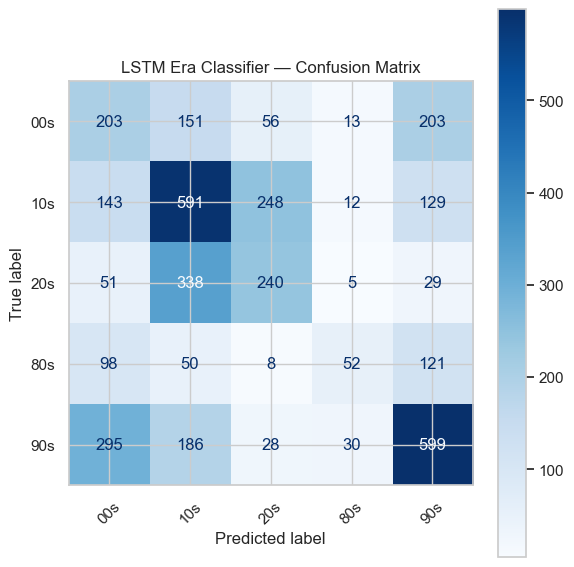

In [107]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X = master_df['clean_detokenized'].values
y = master_df['era'].values


le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = np.unique(y_encoded).shape[0]


param_grid = {
    'lstm_units': [64, 128],
    'dropout_rate': [0.3, 0.5],
    'embedding_dim': [50, 100]
}


def build_lstm_model(lstm_units=128, dropout_rate=0.5, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=embedding_dim, input_length=MAX_LEN),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

OUTER_FOLDS = 5
INNER_FOLDS = 3
MAX_LEN = 200
BATCH_SIZE = 32
EPOCHS_TUNE = 5
EPOCHS_FINAL = 5

outer_cv = StratifiedKFold(n_splits=OUTER_FOLDS, shuffle=True, random_state=42)
all_preds, all_trues = [], []

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y_encoded), start=1):
    X_train_raw, X_test_raw = X[train_idx], X[test_idx]
    y_train_enc,   y_test_enc   = y_encoded[train_idx], y_encoded[test_idx]
    
    y_train_cat = to_categorical(y_train_enc, num_classes=n_classes)
    y_test_cat  = to_categorical(y_test_enc,  num_classes=n_classes)
    
    tokenizer = Tokenizer(num_words=20000, oov_token='<UNK>')
    tokenizer.fit_on_texts(X_train_raw)
    X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
    X_test_seq  = tokenizer.texts_to_sequences(X_test_raw)
    X_train = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
    X_test  = pad_sequences(X_test_seq,  maxlen=MAX_LEN, padding='post', truncating='post')
    
    inner_cv = StratifiedKFold(n_splits=INNER_FOLDS, shuffle=True, random_state=fold_idx)
    best_inner_score = 0.0
    best_params = None
    
    for params in ParameterGrid(param_grid):
        inner_scores = []
        
        for it_idx, iv_idx in inner_cv.split(X_train, y_train_enc):
            X_it, X_iv = X_train[it_idx], X_train[iv_idx]
            y_it_enc, y_iv_enc = y_train_enc[it_idx], y_train_enc[iv_idx]
            y_it = to_categorical(y_it_enc, num_classes=n_classes)
            y_iv = to_categorical(y_iv_enc, num_classes=n_classes)
            
            model = build_lstm_model(**params)
            model.fit(
                X_it, y_it,
                validation_data=(X_iv, y_iv),
                epochs=EPOCHS_TUNE,
                batch_size=BATCH_SIZE,
                verbose=0
            )
            
            preds = model.predict(X_iv).argmax(axis=1)
            inner_scores.append(f1_score(y_iv_enc, preds, average='macro'))
        
        mean_score = np.mean(inner_scores)
        if mean_score > best_inner_score:
            best_inner_score = mean_score
            best_params = params
    
    print(f"Fold {fold_idx}: Best inner params = {best_params}, inner F1 = {best_inner_score:.3f}")
    
    final_model = build_lstm_model(**best_params)
    final_model.fit(
        X_train, y_train_cat,
        epochs=EPOCHS_FINAL,
        batch_size=BATCH_SIZE,
        verbose=0
    )
    

    y_pred = final_model.predict(X_test).argmax(axis=1)
    fold_f1 = f1_score(y_test_enc, y_pred, average='macro')
    print(f"Fold {fold_idx} outer F1: {fold_f1:.3f}\n")
    
    all_preds.extend(y_pred)
    all_trues.extend(y_test_enc)


macro_f1 = f1_score(all_trues, all_preds, average='macro')
print("Overall Macro F1 (5-fold CV):", macro_f1)

print("\nClassification Report:")
print(classification_report(all_trues, all_preds, target_names=le.classes_))


fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(
    all_trues, all_preds,
    display_labels=le.classes_,
    cmap="Blues",
    ax=ax,
    xticks_rotation=45
)
plt.title("LSTM Era Classifier — Confusion Matrix")
plt.tight_layout()
plt.show()